In [ ]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import product

## 1.1 Оценки математического ожидания, дисперсии, медианы

### 1

Пусть случайная величина $\xi$ имеет распределение, задаваемое плотностью $f_\xi(x) = \theta^2 \cdot x \cdot e^{-\theta x}$. Для каждого $\theta \in \{0.5, 2, 8\}$

Можем заметить, что данная СВ $\xi \sim Erlang(\lambda=\theta, k=2)$

Так как плотность вероятности распределения Эраланга:

$f(x) = \frac{e^{-\lambda t} \lambda^k t^{k - 1}}{(k - 1)!}$

Распределение Эрланга является частным случаем Гамма распределения

Распределение Эрланга имеет слудующие формулы для вычисления моментов

$M(\xi) = \frac{2}{\theta}$

$D(\xi) = \frac{2}{\theta^2}$

$D(\xi) = M^2(\xi) - M(\xi)^2 ⇒ M^2(\xi) = D(\xi) + M(\xi)^2 = \frac{2}{\theta^2} + \left(\frac{2}{\theta}\right)^2 = \frac{6}{\theta^2}$

* $\theta = 0.5$
  * $M(\xi) = 4$
  * $D(\xi) = 8$
  * $M^2(\xi) = 24$

* $\theta = 2$
  * $M(\xi) = 1$
  * $D(\xi) = 0.5$
  * $M^2(\xi) = 1.5$

* $\theta = 8$
  * $M(\xi) = 0.25$
  * $D(\xi) = \frac{1}{32}$
  * $M^2(\xi) = \frac{3}{32}$

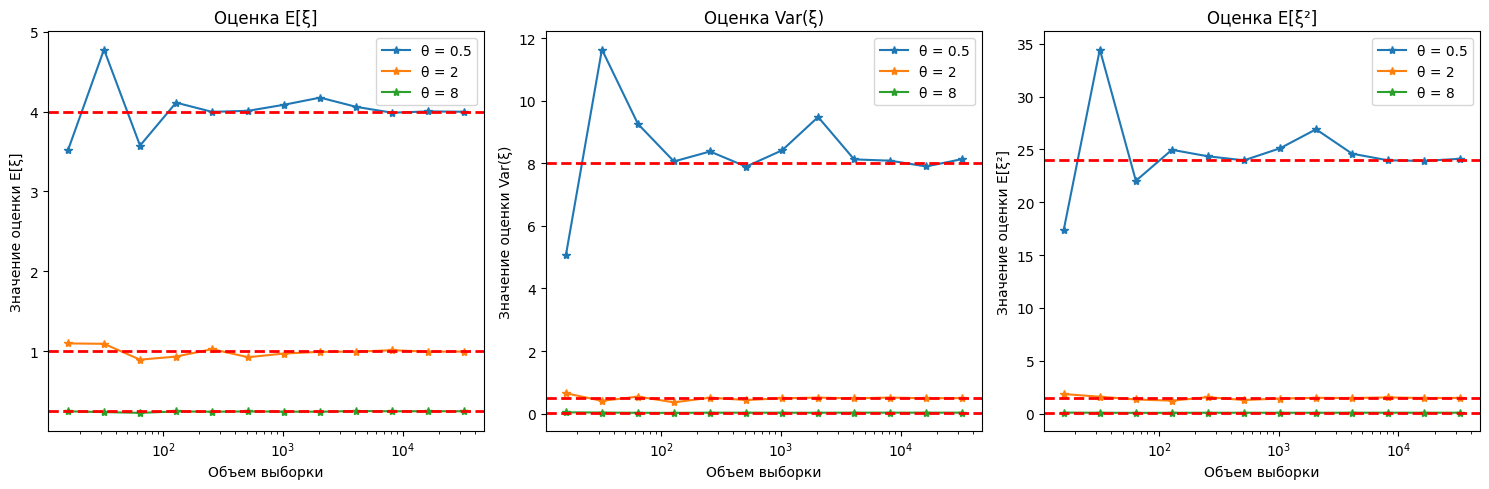

In [ ]:
k_shape = 2
theta_lst = [0.5, 2, 8]
volume_lst = [2 ** i for i in range(4, 16)]
np.random.seed(21)

def analytics_moments(k, theta):
  expected = k / theta
  variance = k / theta ** 2
  expected_square = variance + expected **2
  return expected, variance, expected_square

def calculate_obs(array):
  mean = array.mean()
  var = array.var(ddof=1)
  mean_squared = var + mean ** 2
  return mean, var, mean_squared

def calculation(theta_lst, volume_lst):
  result = []

  for theta in theta_lst:
    expected_lst = []
    variance_lst = []
    expected_square_lst = []

    for volume in volume_lst:
      sample = sps.erlang(a=k_shape, scale=1/theta).rvs(size=volume)
      obs_mean, obs_var, obs_mean_squared = calculate_obs(sample)

      expected_lst.append(obs_mean)
      variance_lst.append(obs_var)
      expected_square_lst.append(obs_mean_squared)
    result.append((expected_lst, variance_lst, expected_square_lst))
  return result

def draw():
  fig, ax = plt.subplots(1, 3, figsize=(15, 5))
  results = calculation(theta_lst, volume_lst)

  analytics = [analytics_moments(k_shape, t) for t in theta_lst]
  titles = ["Оценка E[ξ]", "Оценка Var(ξ)", "Оценка E[ξ²]"]

  for j, axi in enumerate(ax):
    for i, theta in enumerate(theta_lst):
      axi.plot(volume_lst, results[i][j], marker='*', label=f"θ = {theta}")
      axi.axhline(analytics[i][j], color="red", lw=2, ls="--")
    axi.set_title(titles[j])
    axi.set_xscale("log")
    axi.set_ylabel(f"Значение оценки {titles[j].split()[1]}")
    axi.set_xlabel("Объем выборки")
    axi.legend()
  plt.tight_layout()
  plt.show()

draw()

### 2

 Дана плотность распределения случайной величины $\xi$

$
f_{\xi}^{\lambda, a}(x) =
\begin{cases}
\lambda e^{-\lambda (x - a)}, & x \ge a \\
0, & \text{else}
\end{cases}
$

Пусть $(\lambda, a) = (2, 2)$.

* (a) Аналитически вычислите значения моды, математического ожидания и медианы.

* (b) Создайте две выборки: одну довольно большого размера (например, $10000$ наблюдений), и вторую маленькую (например, $20$).
    Постройте оценки моды, математического ожидания и медианы на основе этих выборок.

* (c) Постройте для первой выборки на одном графике:
  * гистограмму распределения значений из выборки,
  * три вертикальные линии, соответствующие оценкам моды, математического ожидания и медианы.
   
  Для второй выборки сделайте то же самое.

    Постройте также график рядом для первой выборки, но уже с функцией плотности распределения и аналитическими значениями моды, математического ожидания и медианы.
    То же самое выполните для второй выборки.

* (d) Попробуйте поизменять размер выборки и посмотрите, например, сходится ли медиана к математическому ожиданию.


Мы имеем дело со сдвинутым экспоненциальным распределением $\xi \sim 2 + Exp(2)$

$mode(\xi) = 2 + 0 = 2$

$M(\xi) = 2 + \frac{1}{2} = 2.5$

$median(\xi) = 2 + \frac{ln 2}{2} = 2.34657$


In [ ]:
exp_lambda = 2
dist = sps.expon(loc=2, scale=1 / exp_lambda)

np.random.seed(21)
small_sample = dist.rvs(size=20)
big_sample = dist.rvs(size=10_00)

print(f"Характеристики центральной тендеции для маленькой выборки = {20} наблюдениям")
print(f"Мода {sps.mode(small_sample)[0]:.2f}")
print(f"Мат. ожидание {small_sample.mean():.2f}")
print(f"Медиана {np.median(small_sample):.2f}", end='\n\n')

print(f"Характеристики центральной тендеции для большой выборки = {10_000} наблюдениям")
print(f"Мода {sps.mode(big_sample)[0]:.2f}")
print(f"Мат. ожидание {big_sample.mean():.2f}")
print(f"Медиана {np.median(big_sample):.2f}")

Характеристики центральной тендеции для маленькой выборки = 20 наблюдениям
Мода 2.01
Мат. ожидание 2.42
Медиана 2.21

Характеристики центральной тендеции для большой выборки = 10000 наблюдениям
Мода 2.00
Мат. ожидание 2.51
Медиана 2.34


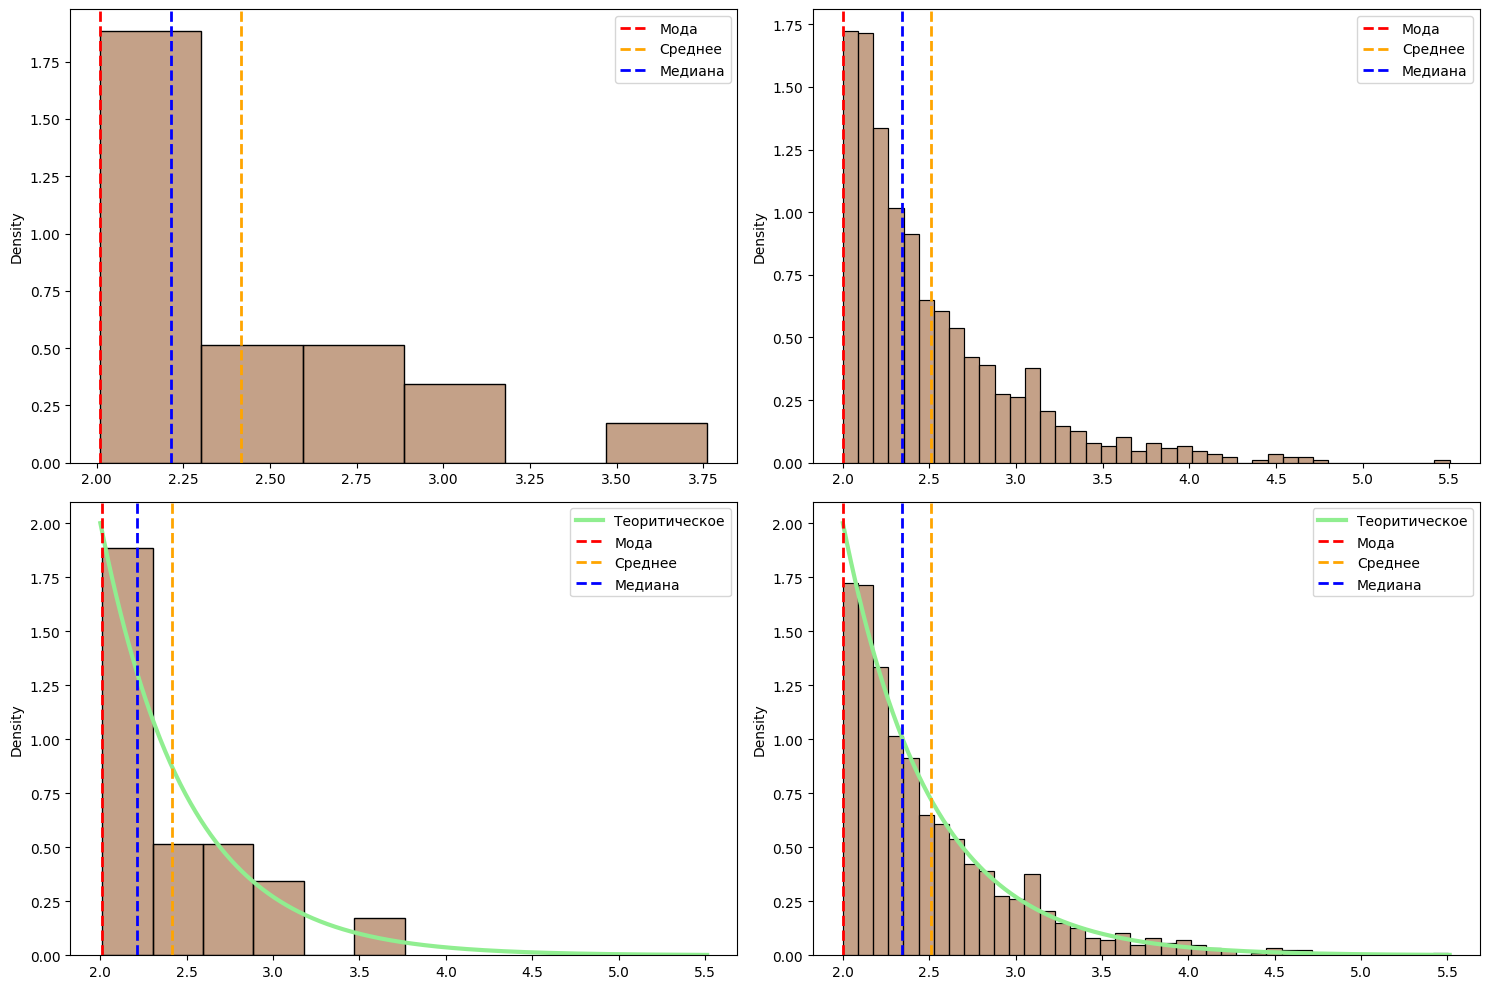

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
x = np.linspace(2, max(small_sample.max(), big_sample.max() + 0.01), 600)

sns.histplot(small_sample, ax=axes[0, 0], alpha=0.5, color="saddlebrown", stat="density")
axes[0, 0].axvline(sps.mode(small_sample)[0], color="red", lw=2, ls="--", label="Мода")
axes[0, 0].axvline(small_sample.mean(), color="orange", lw=2, ls="--", label="Среднее")
axes[0, 0].axvline(np.median(small_sample), color="blue", lw=2, ls="--", label="Медиана")
axes[0, 0].legend()

sns.histplot(big_sample, ax=axes[0, 1], alpha=0.5, color="saddlebrown", stat="density", bins=40)
axes[0, 1].axvline(sps.mode(big_sample)[0], color="red", lw=2, ls="--", label="Мода")
axes[0, 1].axvline(big_sample.mean(), color="orange", lw=2, ls="--", label="Среднее")
axes[0, 1].axvline(np.median(big_sample), color="blue", lw=2, ls="--", label="Медиана")
axes[0, 1].legend()

sns.histplot(small_sample, ax=axes[1, 0], alpha=0.5, color="saddlebrown", stat="density")
axes[1, 0].plot(x, dist.pdf(x), label="Теоритическое", color="lightgreen", lw=3)
axes[1, 0].axvline(sps.mode(small_sample)[0], color="red", lw=2, ls="--", label="Мода")
axes[1, 0].axvline(small_sample.mean(), color="orange", lw=2, ls="--", label="Среднее")
axes[1, 0].axvline(np.median(small_sample), color="blue", lw=2, ls="--", label="Медиана")
axes[1, 0].legend()

sns.histplot(big_sample, ax=axes[1, 1], alpha=0.5, color="saddlebrown", stat="density", bins=40)
axes[1, 1].plot(x, dist.pdf(x), label="Теоритическое", color="lightgreen", lw=3)
axes[1, 1].axvline(sps.mode(big_sample)[0], color="red", lw=2, ls="--", label="Мода")
axes[1, 1].axvline(big_sample.mean(), color="orange", lw=2, ls="--", label="Среднее")
axes[1, 1].axvline(np.median(big_sample), color="blue", lw=2, ls="--", label="Медиана")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

In [65]:
def convergence():
  true_mean = 2 + 1 / 2
  true_mode = 2
  true_median = 2 + np.log(2) / 2

  mean_diff = []
  mode_diff = []
  median_diff = []
  obs_means = []
  obs_modes = []
  obs_medians = []
  mean_median_diff = []

  for volume in volume_lst:
    sample = dist.rvs(volume)
    obs_mode = sps.mode(sample)[0]
    obs_mean = sample.mean()
    obs_median = np.median(sample)

    obs_means.append(obs_mean)
    obs_modes.append(obs_mode)
    obs_medians.append(obs_median)

    mean_diff.append(np.abs(true_mode - obs_mean))
    mode_diff.append(np.abs(true_mode - obs_mode))
    median_diff.append(np.abs(true_median - obs_median))

    mean_median_diff.append(np.abs(obs_mean - obs_median))

  return obs_means, obs_modes, obs_medians, mean_diff, mode_diff, median_diff, mean_median_diff


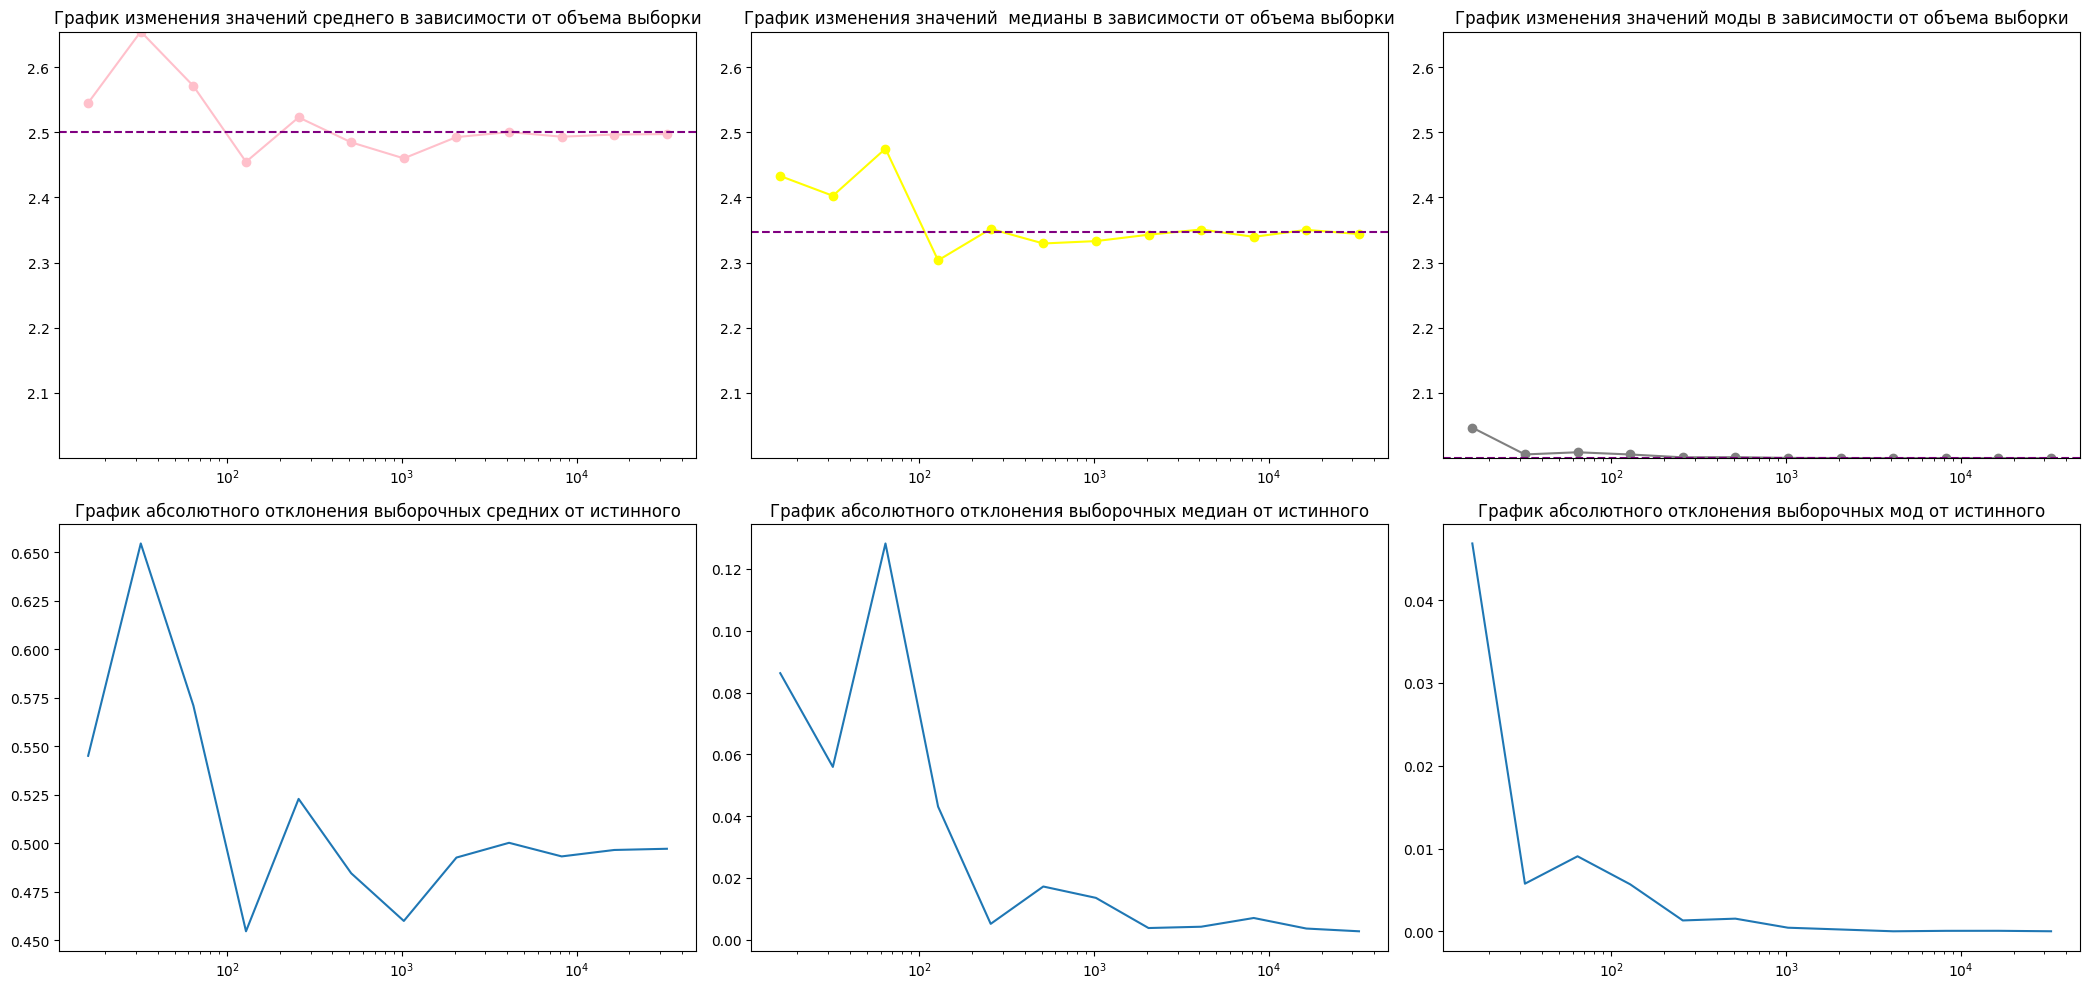

In [66]:
def draw():
  true_mean = 2 + 1 / 2
  true_mode = 2
  true_median = 2 + np.log(2) / 2
  obs_mean, obs_mode, obs_median, mean_diff, mode_diff, median_diff, _ = convergence()
  upper = max(max(obs_mean), max(obs_mode), max(obs_median))
  lower = min(min(obs_mean), min(obs_mode), min(obs_median))
  fig, axes = plt.subplots(2, 3, figsize=(21, 10))

  axes[0, 0].plot(volume_lst, obs_mean, marker="o", color="pink", label="Средние значения выборок")
  axes[0, 0].axhline(true_mean, color="purple", ls="--", label="Истинное среднее")
  axes[0, 0].set_xscale("log")
  axes[0, 0].set_ylim(lower, upper)
  axes[0, 0].set_title("График изменения значений среднего в зависимости от объема выборки")

  axes[0, 1].plot(volume_lst, obs_median, marker="o", color="yellow", label="Медианы выборок")
  axes[0, 1].axhline(true_median, color="purple", ls="--", label="Истинная медиана")
  axes[0, 1].set_xscale("log")
  axes[0, 1].set_ylim(lower, upper)
  axes[0, 1].set_title("График изменения значений  медианы в зависимости от объема выборки")

  axes[0, 2].plot(volume_lst, obs_mode, color="grey", marker="o", label="Мода выборок")
  axes[0, 2].axhline(true_mode, color="purple", ls="--", label="Истинная мода")
  axes[0, 2].set_xscale("log")
  axes[0, 2].set_ylim(lower, upper)
  axes[0, 2].set_title("График изменения значений моды в зависимости от объема выборки")

  axes[1, 0].plot(volume_lst, mean_diff)
  axes[1, 0].set_xscale("log")
  axes[1, 0].set_title("График абсолютного отклонения выборочных средних от истинного")

  axes[1, 1].plot(volume_lst, median_diff)
  axes[1, 1].set_xscale("log")
  axes[1, 1].set_title("График абсолютного отклонения выборочных медиан от истинного")

  axes[1, 2].plot(volume_lst, mode_diff)
  axes[1, 2].set_xscale("log")
  axes[1, 2].set_title("График абсолютного отклонения выборочных мод от истинного")

  plt.tight_layout()
  plt.show()

draw()

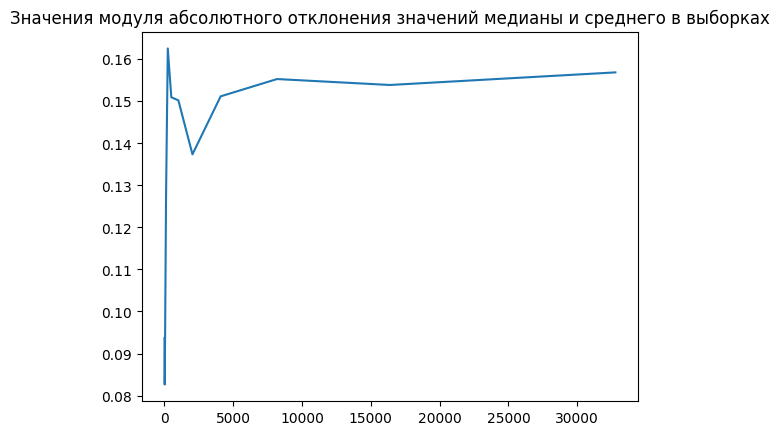

In [67]:
*_, mean_median_diff = convergence()
plt.plot(volume_lst, mean_median_diff)
plt.title("Значения модуля абсолютного отклонения значений медианы и среднего в выборках")
plt.show()

### 1.2 Моделирование совместного распределения двух СВ

Пусть совместное распределение двух случайных величин задано таблицей:

$$
\begin{array}{c|ccc}
\xi \backslash \eta & 1 & 2 & 3 \\
\hline
-1 & \frac{2}{5\cdot 2^1} & \frac{1}{5\cdot 2^2} & \frac{2}{5\cdot 2^3} & ⋯\\
0  & \frac{5}{5\cdot 2^1} & \frac{5}{5\cdot 2^2} & \frac{5}{5\cdot 2^3} & ⋯\\
1  & \frac{2}{5\cdot 2^1} & \frac{1}{5\cdot 2^2} & \frac{2}{5\cdot 2^3} & ⋯
\end{array}
$$

где случайная величина  $\eta \in \mathbb{N}$

Требуется:
1. Аналитически вычислить корреляционную матрицу
2. Приближённо вычислить корреляционную матрицу на основе моделирования



$P(\xi = i, \eta = j) = \frac{\left|i\right| + 1}{5} \cdot \frac{1}{2^j}$

Проверим условия нормировки

$\sum_{j=1}^{\infty}\sum_{i=-1}^{1} P(\xi = i, \eta = j) = \sum_{j=1}^{\infty} \left(\frac{2}{5} \cdot \frac{1}{2^j} + \frac{1}{5} \cdot \frac{1}{2^j} + \frac{2}{5} \cdot \frac{1}{2^j}\right) = 1 \cdot \sum_{j=1}^{\infty} \frac{1}{2^j} = 1$

Найдем маргинальные распределения

Маргинальеное распределение $\xi$

$\sum_{j=1}^{\infty}P(\xi = -1, \eta = j) = \frac{2}{5}$

$\sum_{j=1}^{\infty}P(\xi = 0, \eta = j) = \frac{1}{5}$

$\sum_{j=1}^{\infty}P(\xi = 1, \eta = j) = \frac{2}{5}$

### Маргинальное распределение для $\xi$

| $\xi$ | P|
|------|------------------------------------------|
| -1   | $\frac{2}{5}$                            |
| 0    | $\frac{1}{5}$                            |
| 1    | $\frac{2}{5}$                            |

Маргинальеное распределение $\eta$

$\sum_{i=-1}^{1} P(\xi = i, \eta=j) = 1 \cdot \frac{1}{2^j} =  \frac{1}{2^j}$

Это геометрическое распределение с $p = \frac{1}{2}$

$M(\xi) = -\frac{2}{5} + \frac{2}{5} = 0$

$M^2(\xi) = \frac{2}{5} + \frac{2}{5} = \frac{4}{5}$

$D(\xi) = \frac{4}{5} - 0^2 = \frac{4}{5}$

$M(\eta) = \frac{1}{0.5} = 2$

$M^2(\eta) = 4 + 2 = 6$

$D(\eta) = \frac{1 - 0.5}{0.5^2} = 2$

$M(\xi, \eta) = \sum_{j=1}^{\infty}\sum_{i=-1}^{1} i \cdot j \cdot P(\xi = i, \eta = j) = \sum_{j = 1}^{\infty} \left[-1 \cdot j \cdot \frac{\left|-1\right| + 1}{5} \cdot \frac{1}{2^j} +0 \cdot j \cdot \frac{\left|0\right| + 1}{5} \cdot \frac{1}{2^j}  + 1 \cdot j \cdot \frac{\left|1\right| + 1}{5} \cdot \frac{1}{2^j}\right] = \sum_{j = 1}^{\infty} \left[-1 \cdot j \cdot \frac{2}{5} \cdot \frac{1}{2^j} +0 \cdot j \cdot \frac{1}{5} \cdot \frac{1}{2^j}  + 1 \cdot j \cdot \frac{2}{5} \cdot \frac{1}{2^j}\right] = \sum_{j = 1}^{\infty} \left(\frac{-2j}{5} \cdot \frac{1}{2^j} + \frac{2j}{5} \cdot \frac{1}{2^j}\right) = 0$

$Cov = 0$

| | $\xi$| $\eta$|
|-|------|--------------|
|$\xi$| $\frac{4}{5}$| 0|
|$\eta$| 0    | 2|

$Corr = 0$

| | $\xi$| $\eta$|
|-|------|--------------|
|$\xi$| 1| 0|
|$\eta$| 0    | 1|

In [73]:
np.random.seed(21)
n = 100_000

xi_values = np.array([-1, 0, 1])
xi_probs  = np.array([2/5, 1/5, 2/5])

xi = np.random.choice(xi_values, size=n, p=xi_probs)

eta = np.random.geometric(p=0.5, size=n)

assert eta.min() >= 1, "Ошибка: eta должен быть >= 1"

mean_xi = xi.mean()
mean_eta = eta.mean()
var_xi = xi.var()
var_eta = eta.var()

cov_matrix = np.cov(xi, eta)

print("Выборочные оценки:")
print(f"  M[ξ] ≈ {mean_xi:.4f}   (теоретически: 0)")
print(f"  M[η] ≈ {mean_eta:.4f}  (теоретически: 2)")
print(f"  D[ξ] ≈ {var_xi:.4f}   (теоретически: 0.8)")
print(f"  D[η] ≈ {var_eta:.4f}  (теоретически: 2)")

print("\nМатрица ковариаций:")
print(cov_matrix)

print("\nКоэффициент корреляции:")
corr_coef = np.corrcoef(xi, eta)[0, 1]
print(f"  ρ(ξ, η) ≈ {corr_coef:.6f}  (теоретически: 0)")

print("\n Матрица корреляции:")
corr_matrix = np.corrcoef(xi, eta)
print(corr_matrix)

Выборочные оценки:
  M[ξ] ≈ 0.0010   (теоретически: 0)
  M[η] ≈ 1.9940  (теоретически: 2)
  D[ξ] ≈ 0.7986   (теоретически: 0.8)
  D[η] ≈ 1.9793  (теоретически: 2)

Матрица ковариаций:
[[ 0.79857688 -0.00628372]
 [-0.00628372  1.97932331]]

Коэффициент корреляции:
  ρ(ξ, η) ≈ -0.004998  (теоретически: 0)

 Матрица корреляции:
[[ 1.         -0.00499804]
 [-0.00499804  1.        ]]
